# Question 1

Calculate the closeness centrality of each of the nodes in this network:

In [11]:
#Imports Libraries 

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline


In [12]:
G1 = nx.Graph()

edge_list = [(1,2),(1,5),(1,6),(2,3),(2,7),(3,4),(3,8),(4,5),(4,9),(5,10),(6,8),(6,9),(7,9),(7,10),(8,10)]
G1.add_edges_from(edge_list)
print(nx.closeness_centrality(G1))

{1: 0.6, 2: 0.6, 5: 0.6, 6: 0.6, 3: 0.6, 7: 0.6, 4: 0.6, 8: 0.6, 9: 0.6, 10: 0.6}


# Question 2

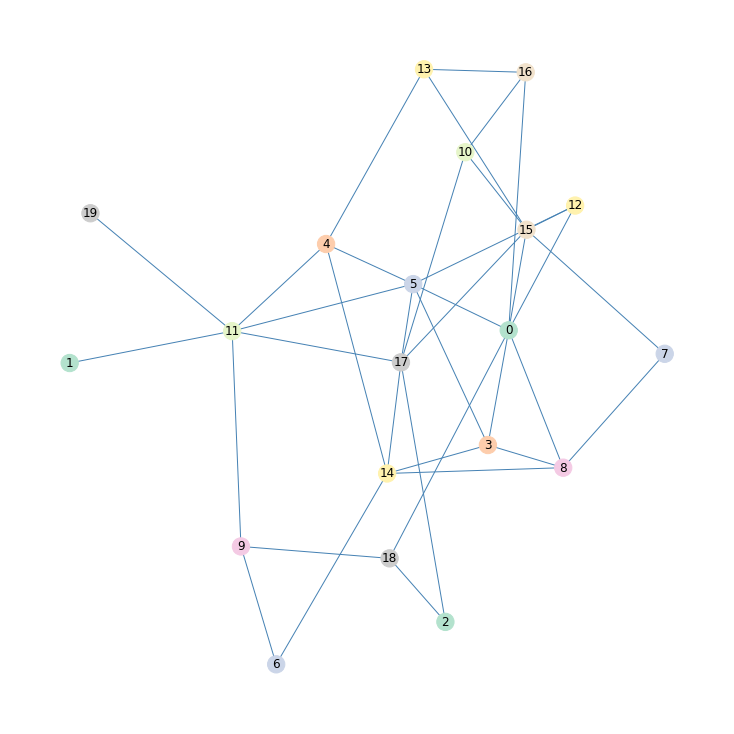

In [13]:
G2 = nx.gnp_random_graph(20, 0.2, seed=1096)

plt.figure(figsize = (10,10))
nx.draw(G2, with_labels = True, edge_color = "#4682b4", node_color = range(len(G2)) , cmap = plt.cm.Pastel2)
plt.show()


In [14]:
nx.transitivity(G2)

0.18461538461538463